## Bresenham 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12
print("Meow")

Meow


Your task is to implement the bresenham function given two points $p_1$ and $p_2$ as inputs. The function should return the list of grid cells required to draw the line.

What conditions would warrant a move by 1 unit along the x-axis? What about along the y-axis?

The idea is to move based on whether the next $y$ value will be above or below the line from $p_1$ to $p_2$. We can keep track of the current line value, effectively $f(x)$ where $f$ is the line equation by incrementing a counter variable by the slope $m$ whenever we move in the x-axis.

The condition is then (in pseudocode):

```
if f(x+1) > y + 1:
    y += 1
else:
    x += 1
```

So, if moving along the y-axis results in a y value that is below the line, then move along the y-axis, otherwise,  move in the x-axis.

But what about the case where `f(x+1) == y+1`? This will be the result of every test case when the line slope `m = 1`. In this case you have a choice to make:
* Only identify cells that as "in collision" when the line actually passes through those cells (less conservative obstacle avoidance)
* When the line passes directly through a corner of grid cells, identify all cells that share that corner as "in collision" (more conservative obstacle avoidance). 

These two options look like this for a line from (0, 0) to (5, 5):

![comparison](./bresenham_comparison.png)

Try coding up both! In the event that you've padded obstacles  in your grid map with a sufficient safety margin, you can likely get away with the less conservative approach (or computer graphics based Bresenham implementation in the Python package shown below).


In [11]:
def bres(p1, p2): 
    """
    Extended method for any p1 and p2
    """
    x1, y1 = p1
    x2, y2 = p2
    # First, set dx = x2 - x1 and dy = y2 - y1
    dx, dy = x2 - x1, y2 - y1
    try:
        x_st = dx//abs(dx)
    except ZeroDivisionError:
        x_move = 0
        y_move = 1
        x_st = 1
    try:
        y_st = dy//abs(dy)
    except ZeroDivisionError:
        y_move = 0
        x_move = 1
        y_st = 1
        
    cells = []
    # TODO: Determine valid grid cells

    try:
        m = (y2 - y1)/(x2 - x1) #slope
        b = y2 - m * x2
        s = dx/abs(dx) #sign to multipy without replacing < with >
    except ZeroDivisionError:
        b = 0
        s = 1
    # The condition we care about is whether 
    # (x + x_step) * m  + b < y + y_step
    # (x + x_step) dy / dx < y + y_step - b 
    # which implies (dx < 0 case included): 
    # s *(x dy - y dx) < s *(y_st*dx - x_st*dy -b*dx)
    # Then define a new quantity: d = x dy - y dx
    # new condition: s*d < s*(y_st*dx - x_st*dy - b*dx)
    # and set d = 0 initially    
    d = x1 * dy - y1 * dx
    # Initialize i, j indices
    i = x1
    j = y1    
    while abs(i-x1) <= abs(dx) and abs(j-y1) <= abs(dy):  
        print('x,y',(i,j), abs(i-x1), abs(dx),abs(j-y1), abs(dy))
        cells.append([i,j])
        print('cells',cells)
        if dx == 0 or dy == 0:
            cells.append([i - x_st*y_move, j - y_st*x_move])
        elif s*d < s*(y_st * dx - x_st * dy - b * dx):
            #(x+1)m<y+1      (x+1)m=y+1   (x+1)m>y+1, m > 0
            #|----------|    |-----|      |--|     
            #|          |dy  |     |dy    |  |dy
            #|----------|    |-----|      |--|
            #  dx              dx          dx 
            
            #(x+1)m+b < y+1 => __/ x += 1, dy>0
            #OR 
            #(x-1)m+b < y-1 => y -= 1, dy<0
            print('<')
            x_move = (abs(dy) + dy)//(2 * abs(dy)) #1 in case dy>0
            y_move = (abs(dy) - dy)//(2 * abs(dy)) #1 in case dy<0
        elif s*d > s*(y_st * dx - x_st * dy - b * dx):
            #(x+1)m+b > y+1 => __/ y += 1, dy>0
            #OR 
            #(x-1)m+b > y-1 => x -= 1, dy<0
            print('>')
            x_move = (abs(dy) - dy)//(2 * abs(dy))
            y_move = (abs(dy) + dy)//(2 * abs(dy))
            #print('ij',i,j,'xmv,ymv',x_move,y_move,'ix1,jy1',i-x1,j-y1) 
        elif s*d == s*(y_st * dx - x_st * dy - b * dx): 
            # uncomment these two lines for conservative approach
            cells.append([i + x_st, j])
            cells.append([i, j + y_st])
            print('=',s*d,s*(- b))
            x_move = 1
            y_move = 1
        else:
            x_move = 0
            y_move = 0
        i += x_st * x_move 
        j += y_st * y_move 
        d += x_st*x_move*dy - y_st*y_move*dx
    return np.array(cells)

def line_in_cells_plt(p1, p2, cells):
    x1, y1 = p1
    x2, y2 = p2
    # First, set dx = x2 - x1 and dy = y2 - y1
    dx, dy = x2 - x1, y2 - y1
    try:
        x_st = dx//abs(dx)
    except ZeroDivisionError:
        x_st = 1
    try:
        y_st = dy//abs(dy)
    except ZeroDivisionError:
        y_st = 1
        
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]])

    for q in cells:
        print(q)
        plt.plot([q[0], q[0]+x_st], [q[1], q[1]], 'k')
        plt.plot([q[0], q[0]+x_st], [q[1]+y_st, q[1]+y_st], 'k')
        plt.plot([q[0], q[0]], [q[1],q[1]+y_st], 'k')
        plt.plot([q[0]+x_st, q[0]+x_st], [q[1], q[1]+y_st], 'k')

    plt.grid()
    plt.axis('equal')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Integer based Bresenham algorithm")
    plt.show()
    

Plotting the line with the cells which it crosses. 

x,y (4, 4) 0 13 0 0
cells [[4, 4]]
x,y (3, 4) 1 13 0 0
cells [[4, 4], [4, 3], [3, 4]]
x,y (2, 4) 2 13 0 0
cells [[4, 4], [4, 3], [3, 4], [3, 3], [2, 4]]
x,y (1, 4) 3 13 0 0
cells [[4, 4], [4, 3], [3, 4], [3, 3], [2, 4], [2, 3], [1, 4]]
x,y (0, 4) 4 13 0 0
cells [[4, 4], [4, 3], [3, 4], [3, 3], [2, 4], [2, 3], [1, 4], [1, 3], [0, 4]]
x,y (-1, 4) 5 13 0 0
cells [[4, 4], [4, 3], [3, 4], [3, 3], [2, 4], [2, 3], [1, 4], [1, 3], [0, 4], [0, 3], [-1, 4]]
x,y (-2, 4) 6 13 0 0
cells [[4, 4], [4, 3], [3, 4], [3, 3], [2, 4], [2, 3], [1, 4], [1, 3], [0, 4], [0, 3], [-1, 4], [-1, 3], [-2, 4]]
x,y (-3, 4) 7 13 0 0
cells [[4, 4], [4, 3], [3, 4], [3, 3], [2, 4], [2, 3], [1, 4], [1, 3], [0, 4], [0, 3], [-1, 4], [-1, 3], [-2, 4], [-2, 3], [-3, 4]]
x,y (-4, 4) 8 13 0 0
cells [[4, 4], [4, 3], [3, 4], [3, 3], [2, 4], [2, 3], [1, 4], [1, 3], [0, 4], [0, 3], [-1, 4], [-1, 3], [-2, 4], [-2, 3], [-3, 4], [-3, 3], [-4, 4]]
x,y (-5, 4) 9 13 0 0
cells [[4, 4], [4, 3], [3, 4], [3, 3], [2, 4], [2, 3], [1, 4], [1, 3

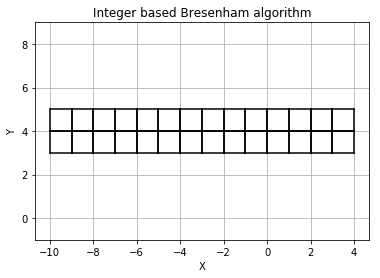

In [17]:
p1 = (4,4)
p2 = (-9,4)

cells = bres(p1, p2)
#print(cells)
line_in_cells_plt(p1,p2,cells)


Check out our solution [here](/notebooks/Bresenham-Solution.ipynb).

### Python Bresenham Package
For comparison let's have a look at the Python Bresenham package! As mentioned above, if you've added a safety margin around obstacles you are probably fine using this package or one like it that misses some cells in collision with the line.

First we need to import it:

In [65]:
from bresenham import bresenham

Next we can run the same experiment as above and plot it up.

[(0, 0), (1, 1), (2, 1), (3, 2), (4, 3), (5, 4), (6, 4), (7, 5)]


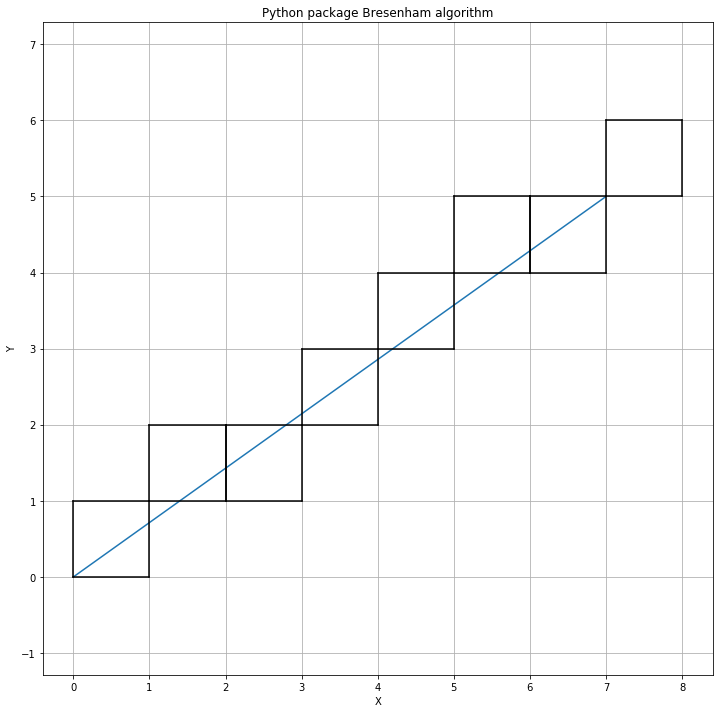

In [66]:
# Note: you can run this for any (x1, y1, x2, y2)
line = (0, 0, 7, 5)

cells = list(bresenham(line[0], line[1], line[2], line[3]))
print(cells)

plt.plot([line[0], line[2]], [line[1], line[3]])


for q in cells:
    plt.plot([q[0], q[0]+1], [q[1], q[1]], 'k')
    plt.plot([q[0], q[0]+1], [q[1]+1, q[1]+1], 'k')
    plt.plot([q[0], q[0]], [q[1],q[1]+1], 'k')
    plt.plot([q[0]+1, q[0]+1], [q[1], q[1]+1], 'k')

plt.grid()
plt.axis('equal')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Python package Bresenham algorithm")
plt.show()